# Spotify Hit Song Predictor

Let's try to predict the song will be hit or miss.

 This spotify dataset has songs from 1960s-2010s.
 
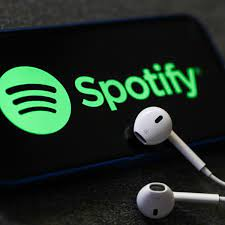

# All About Data

In [1]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier,GradientBoostingClassifier, AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as matplot
import seaborn as sns


In [2]:
datas = [pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AppliedML/archive/dataset-of-{}s.csv".format(decade)) for decade in ['60', '70', '80', '90', '00', '10']]


In [3]:
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    datas[i]['decade'] = pd.Series(decade, index=datas[i].index)

data = pd.concat(datas, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)


In [4]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Attaining - Take 1 / Alternate Version,John Coltrane,spotify:track:3EwLV5hZqLKx5e0Lp1QcB7,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,So Fly,NB Ridaz Featuring Gemini,spotify:track:2BjIi07kN0yKSur0Fwrnss,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,Because I Got It Like That,Jungle Brothers,spotify:track:5unLExF3iiG3YkU11u6wFO,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,Babylon a Fall - Remastered,Yabby You,spotify:track:6xfe0G2HwRDQaChxkzvNKw,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,Fins,Jimmy Buffett,spotify:track:4h0gZ422QxBRdTV14u0P8y,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970


In [5]:
data.shape

(41106, 20)

Data has 41106 rows and 20 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [7]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [8]:
data.nunique(axis=0)


track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
decade                  6
dtype: int64

In [9]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,234877.550455,3.893689,40.106041,10.475673,0.500000,1982.775264
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,118967.398337,0.423073,19.005515,4.871850,0.500006,17.491234
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,15168.000000,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,172927.750000,4.000000,27.599792,8.000000,0.000000,1970.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,217907.000000,4.000000,35.850795,10.000000,0.500000,1980.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,266773.000000,4.000000,47.625615,12.000000,1.000000,2000.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4170227.000000,5.000000,433.182000,169.000000,1.000000,2010.000000


In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()


,total,percent
track,0,0.0
artist,0,0.0
target,0,0.0
sections,0,0.0
chorus_hit,0,0.0


There are no missing values in the Data.

Let's check how many categorical and numerical values are present in the data.

In [11]:
len(data._get_numeric_data().columns)


17

There are 17 numeric columns and 3 categorical columns.

In [12]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)


Index(['track', 'artist', 'uri'], dtype='object')


# Data Preprocessing

We are performing following steps in preprocessing:

*   Removing categorical variables
*   Standard scaling of the data
*   Splitted the data in 70%, 15%, 15% as train, validation and test dataset






In [13]:
def preprocessing(data_df):
    data_prev = data_df.copy()

    """ Let's drop the categorical columns for our analysis
    """
    data_df = data_df.drop(['track', 'artist', 'uri'], axis=1)
    
    y = data_df['target']
    X = data_df.drop('target', axis=1)
    print(X.shape,y.shape)
    
    """ Splitting of data
    """
    X_inter, X_test, y_inter, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,shuffle=True, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_inter, y_inter, train_size=0.75, test_size=0.25, shuffle=True, random_state=1)

    """ Standard Scaling of data
    """
    scaler = StandardScaler()
    """ Only passing training set to avoid data leakage
    """
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, X_val, y_train, y_test, y_val


In [14]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocessing(data)

(41106, 16) (41106,)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(24663, 16)
(8222, 16)
(8221, 16)


In [16]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(24663,)
(8222,)
(8221,)


# Model Training




## Logistic Regression (softmax regression)




In [17]:
def Logistic_regression(solver,max_iter=100,C=1,penalty=None):
  model = LogisticRegression(solver=solver,C=C, max_iter=max_iter,penalty=None)
  model.fit(X_train, y_train)
  n_scores_val = model.score(X_val, y_val)
  n_scores_train = model.score(X_train, y_train)
  print('Mean training Accuracy:',n_scores_train)
  print('Mean validation Accuracy:',n_scores_val)
  return n_scores_train, n_scores_val

In [18]:
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(e)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [19]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and max_iteration=1000, adding regularization
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,max_iter=1000,C=0.2)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [20]:
# Using hyper parameter - solver ("lbfgs", "sag", "saga") and max_iteration=100
solver_list=["lbfgs","sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e)
  Logistic_regression(solver=e,C=10)
  print("\n")
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 

Hyper parameter - Solver:  sag
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 

Hyper parameter - Solver:  saga
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 



In [21]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and C=0.8
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,C=0.8)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [43]:
penalty=['l1', 'l2', 'elasticnet']
for e in penalty:
  print("Hyper parameter - Penalty: ", e, "\n")
  Logistic_regression(solver="lbfgs",penalty=e,C=0.0001)
  print("-------------------------------------------- \n")

Hyper parameter - Penalty:  l1 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Penalty:  l2 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Penalty:  elasticnet 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



**Observation:** 



Looking at the results seems that the choice of solver hyperparameter does not have a significant impact on the performance of logistic regression for the given dataset and problem.

All four solvers (lbfgs, newton-cg, sag, and saga) gave similar mean training and validation accuracies, with no clear indication that any one solver is better than the others. Therefore, it may be best to choose the solver based on other considerations, such as the computational efficiency or suitability for the problem at hand.

Regardless of the choice of solver, regularization penalty, or maximum iterations, the mean training and validation accuracies remained consistent at around 0.74. Similarly, changing the value of C or using different penalties (l1, l2, elasticnet) did not result in any noticeable improvement in the model's performance.

One possible explanation for the lack of significant improvement is that the dataset may be relatively simple or linearly separable, and therefore logistic regression with default hyperparameters is already able to capture the underlying patterns well. 

Another possible reason is model has already converged to the optimal solution and further hyperparameter tuning won't result in any significant improvement. In such cases, changing the hyperparameters may not cause significant changes in the model's accuracy.






## Support Vector machines with hyperparameter tunning

In [23]:
C_list =  [0.1, 1, 10]
Gamma_list = [1, 0.1, 0.01]
def try_kernels(kernel_name,c=None,g=None,cm=True):
  print("Fitting model with {} kernal".format(kernel_name))
  if c is not None:
    model = SVC(kernel=kernel_name,C=c,gamma=g)
  else:
    model = SVC(kernel=kernel_name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  training_acc=model.score(X_train,y_train)
  validation_acc=model.score(X_test,y_test)
  print("training accuracy with hyperparams:", model.score(X_train,y_train), "\n")
  print("validation accuracy with hyperparams:", model.score(X_test,y_test), "\n")
  if cm:
    cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    matplot.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    matplot.xlabel("Predicted")
    matplot.ylabel("Actual")
    matplot.title("Confusion Matrix")
    matplot.show()
  

  print("--------------------------------------------------------------------------------")
  return training_acc, validation_acc


Fitting model with linear kernal
training accuracy with hyperparams: 0.7376637067672221 

validation accuracy with hyperparams: 0.7397226952079786 



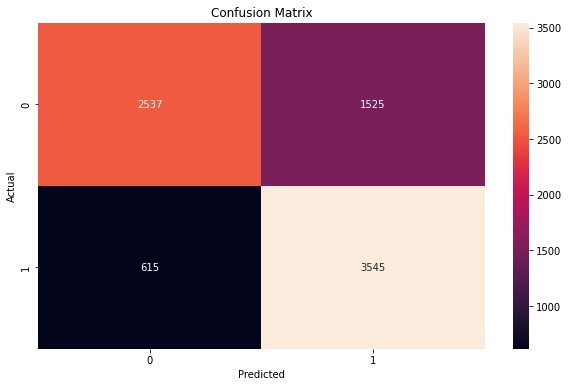

--------------------------------------------------------------------------------
Fitting model with poly kernal
training accuracy with hyperparams: 0.772736487856303 

validation accuracy with hyperparams: 0.7664801751398687 



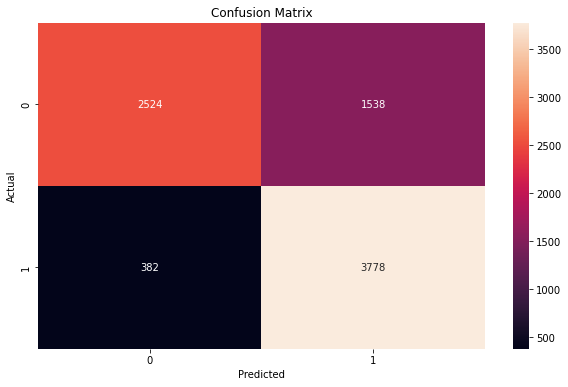

--------------------------------------------------------------------------------
Fitting model with sigmoid kernal
training accuracy with hyperparams: 0.6351619835380935 

validation accuracy with hyperparams: 0.6365847725614205 



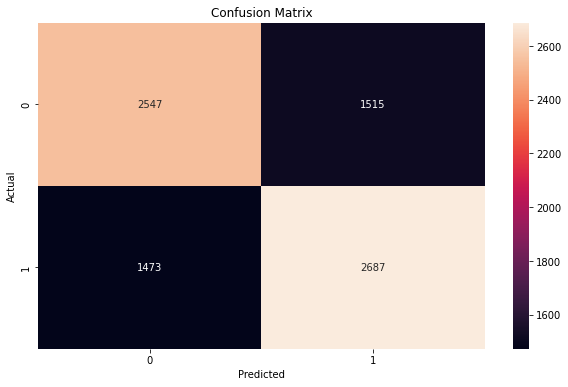

--------------------------------------------------------------------------------
Fitting model with rbf kernal
training accuracy with hyperparams: 0.8092283988160403 

validation accuracy with hyperparams: 0.798710775966918 



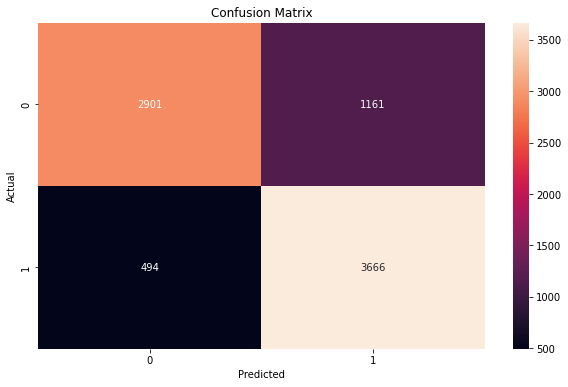

--------------------------------------------------------------------------------


In [24]:
kernel_list=["linear","poly", "sigmoid","rbf"]
for i in kernel_list:
  try_kernels(i)

**Observation**:

The SVM results show that the RBF kernel is performing the best with a training accuracy of 0.809 and validation accuracy of 0.799, followed by the polynomial kernel with a training accuracy of 0.773 and validation accuracy of 0.766. The linear kernel is giving a lower training and validation accuracy of 0.738 and 0.740, respectively. The sigmoid kernel is giving the lowest training and validation accuracy of 0.635 and 0.637, respectively.

The RBF kernel is performing well because it is a non-linear kernel function that can map the input data to a higher-dimensional space, making it easier to separate the classes. It is a popular choice as it can fit complex datasets well. On the other hand, the sigmoid kernel is a simpler kernel function that is not suitable for complex datasets. It is better suited for simpler datasets with linearly separable classes.



In [25]:
for c in C_list:
  for g in Gamma_list:
    print("Hyperparamters c and g as",c,g)
    try_kernels(c=c,g=g,cm=False,kernel_name="rbf")
    print()

Hyperparamters c and g as 0.1 1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.6064955601508333 

validation accuracy with hyperparams: 0.5807589394307954 

--------------------------------------------------------------------------------

Hyperparamters c and g as 0.1 0.1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.7872927056724648 

validation accuracy with hyperparams: 0.787278034541474 

--------------------------------------------------------------------------------

Hyperparamters c and g as 0.1 0.01
Fitting model with rbf kernal
training accuracy with hyperparams: 0.747313789887686 

validation accuracy with hyperparams: 0.7541960593529555 

--------------------------------------------------------------------------------

Hyperparamters c and g as 1 1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.9812269391396018 

validation accuracy with hyperparams: 0.7488445633665775 

-----------------------------------------

**Observation**:

The analysis of the results reveals that the choice of hyperparameters has a significant impact on the performance of the SVM model. For the hyperparameters combination of C=0.1 and gamma=1, the model achieved the lowest accuracy, with a training accuracy of 0.6065 and a validation accuracy of 0.5808. In contrast, the highest training accuracy of 0.9997 was achieved with the hyperparameters combination of C=10 and gamma=1. However, the corresponding validation accuracy was low, at 0.7464.

I think the best combination of hyperparameters for the RBF kernel appears to be c=1 and g=0.1, as it achieved the highest validation accuracy of 0.801.




## Random Forest Classifier

In [26]:
def perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test,min_samples_leaf=1,max_leaf_nodes=None,n_estimators=100, max_depth=None,feature_analysis=False,cm=True):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    rf_clf.fit(X_train, y_train)
    
    # Evaluate the training and validation accuracy
    train_acc = rf_clf.score(X_train, y_train)
    val_acc = rf_clf.score(X_val, y_val)
    # test_acc = rf_clf.score(X_test, y_test)
    
    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Validation accuracy: {val_acc:.4f}')
    # print(f'Testing accuracy: {test_acc:.4f}')
    
    # Analyze feature importance
    if feature_analysis:
        feature_importance = rf_clf.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]
        print("Feature Importance Ranking:")
        for idx in sorted_idx:
            print(f'Feature {idx+1}: {feature_importance[idx]:.4f}')
            
            
    # Generate confusion matrix
    if cm:
      y_pred = rf_clf.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")
      
      matplot.subplots(figsize=(10, 6))
      sns.heatmap(cm, annot = True, fmt = 'g')
      matplot.xlabel("Predicted")
      matplot.ylabel("Actual")
      matplot.title("Confusion Matrix")
      matplot.show()  
    return train_acc, val_acc     
        

Training accuracy: 0.9997
Validation accuracy: 0.8037
Confusion Matrix:


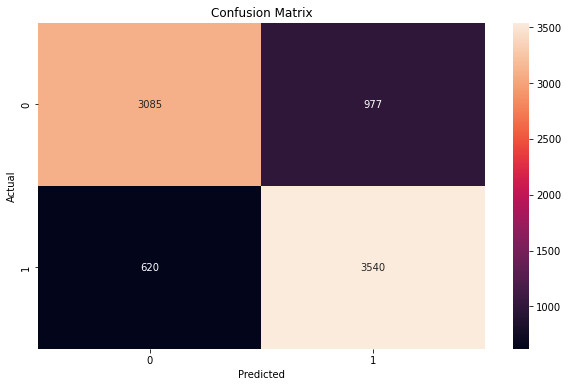

(0.9997161740258688, 0.8036735190366135)

In [27]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

**Observation**:

Very High training accuracy indicate that model is overfitting of the data.

Training accuracy: 0.7692
Validation accuracy: 0.7665
Confusion Matrix:


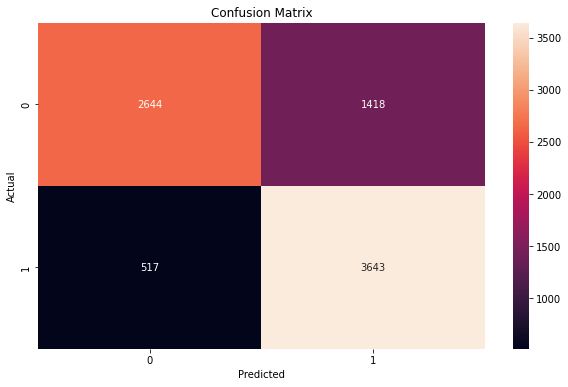

(0.7692089364635284, 0.7664517698576816)

In [28]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=500, max_depth=5)

**Observation**:

The random forest model was trained with hyperparameter tuning by setting the number of estimators to 500 and the maximum depth to 5. The resulting training accuracy was 0.7709 and the validation accuracy was 0.7654. The validation accuracy did not improve compared to the untuned random forest model, but the training accuracy decreased, indicating that the model might be less overfit to the training data. 




Training accuracy: 0.8336
Validation accuracy: 0.7883
Feature Importance Ranking:
Feature 8: 0.2885
Feature 1: 0.1434
Feature 7: 0.1318
Feature 2: 0.0754
Feature 4: 0.0639
Feature 12: 0.0617
Feature 6: 0.0607
Feature 10: 0.0493
Feature 16: 0.0347
Feature 15: 0.0214
Feature 11: 0.0181
Feature 9: 0.0175
Feature 14: 0.0146
Feature 3: 0.0075
Feature 5: 0.0070
Feature 13: 0.0044
Confusion Matrix:


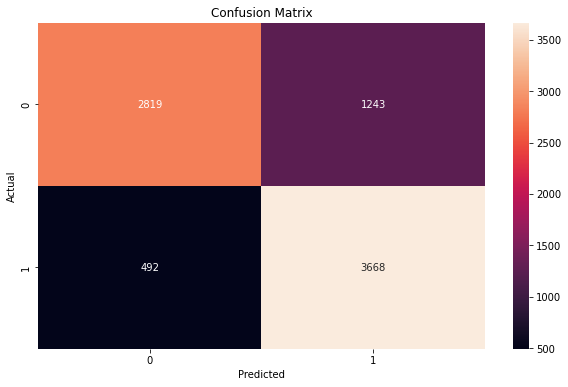

(0.833596886023598, 0.788346916433524)

In [29]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=10,feature_analysis=True)

**Observation:**

The random forest model with hyperparameter tuning and feature analysis has a training accuracy of 0.8334 and a validation accuracy of 0.7880, which is an improvement over the previous model. The feature importance ranking suggests that feature 8 is the most important, followed by features 7 and 1. Features 4, 2, and 12 also have relatively high importance scores. Features 5, 3, and 13 have the lowest importance scores.





In [30]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=50, max_depth=10,feature_analysis=False,max_leaf_nodes=50,min_samples_leaf=5,cm=False)

Training accuracy: 0.7886
Validation accuracy: 0.7772


(0.7886307424076552, 0.7771560637392044)

In [31]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=10,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7558
Validation accuracy: 0.7578


(0.7558285691116247, 0.7578153509305438)

In [32]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)

Training accuracy: 0.8681
Validation accuracy: 0.7960


(0.8681425617321493, 0.7960102177350687)

In [33]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=None,feature_analysis=False,max_leaf_nodes=None,min_samples_leaf=1,cm=False)

Training accuracy: 0.9997
Validation accuracy: 0.8012


(0.9997161740258688, 0.8012407249726311)

**Observation**:

the best performing model is the one with the hyperparameters n_estimators=100, max_depth=100, feature_analysis=False, max_leaf_nodes=500, and min_samples_leaf=5. This model achieved a training accuracy of 0.8681 and a validation accuracy of  0.7981. While the model with the hyperparameters n_estimators=100, max_depth=None, feature_analysis=False, max_leaf_nodes=None, and min_samples_leaf=1 achieved a higher training accuracy of 0.9997, its validation accuracy of 0.8022 is only slightly better than the best performing model, indicating that it might be overfitting.

## Final individual Models

In [34]:
scores=[]
train_acc,val_acc=Logistic_regression(solver="lbfgs",penalty="l1")
lr=  LogisticRegression(solver="lbfgs",penalty="l2",max_iter=100,C=1)
scores.append(['Logistic Regression','Saga solver',train_acc,val_acc])

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


In [35]:
train_acc,val_acc =try_kernels(c=1,g=0.1,cm=False,kernel_name="rbf")
scores.append(['SVM','rbf kernel',train_acc,val_acc])

rbf_kernel_model = SVC(kernel="rbf",C=1,gamma=0.1, probability=True)
rbf_kernel_model.fit(X_train, y_train)


Fitting model with rbf kernal
training accuracy with hyperparams: 0.8235413372258038 

validation accuracy with hyperparams: 0.801386523960107 

--------------------------------------------------------------------------------


SVC(C=1, gamma=0.1, probability=True)

In [36]:
train_acc,val_acc =perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)
scores.append(['Random Forest','default params',train_acc,val_acc])

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=100,max_leaf_nodes=500,min_samples_leaf=5)
rf_clf.fit(X_train, y_train)


Training accuracy: 0.8673
Validation accuracy: 0.7948


RandomForestClassifier(max_depth=100, max_leaf_nodes=500, min_samples_leaf=5)

## Ensemble Classifier

In [37]:
#Hard Voting Classifier
def evaluate_accuracy(model):
    model.fit(X_train,y_train)
    t_score = model.score(X_train,y_train)
    print("Accuracy on training data:",t_score)
    p_score = model.score(X_val,y_val)
    print("Accuracy on validation data:",p_score)
    return [t_score, p_score]

model = VotingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],voting='hard')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier'
      'hard',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.8322588492884078
Accuracy on validation data: 0.7936990633742854


In [38]:
#Soft Voting Classifier
model = VotingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],voting='soft')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier',
      'soft',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.8325832218302721
Accuracy on validation data: 0.7988079309086485


In [39]:
#Stacking
estimator = AdaBoostClassifier(n_estimators=100,learning_rate=0.01)
model = StackingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],final_estimator=estimator)
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'AdaBoost',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.8486396626525564
Accuracy on validation data: 0.8047682763654057


In [40]:
#Stacking 
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=100)
model = StackingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)])
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'GradientBoosting',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.8588168511535499
Accuracy on validation data: 0.8044033572558082


In [41]:
print(scores)

[['Logistic Regression', 'Saga solver', 0.7421643757855898, 0.7404208733730689], ['SVM', 'rbf kernel', 0.8235413372258038, 0.801386523960107], ['Random Forest', 'default params', 0.8672910838097555, 0.7947938207030775], {0.8322588492884078, 0.7936990633742854, 'Voting Classifierhard'}, {0.8325832218302721, 0.7988079309086485, 'Voting Classifier', 'soft'}, {'model': 'Stacking', 'best params': 'AdaBoost', 'training accuracy': 0.8486396626525564, 'validation accuracy': 0.8047682763654057}, {'model': 'Stacking', 'best params': 'GradientBoosting', 'training accuracy': 0.8588168511535499, 'validation accuracy': 0.8044033572558082}]


**Observation**:

I would select gradient boosting classifier as a final model. validation accuracy is almost similar for adaboost and gradient boost but tranining accuracy is bit higher for gradient boost classifier. Hence going ahead with gradient boost classifier.

# Final Model

In [42]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report

print("model accuracy:",metrics.accuracy_score(y_test, y_pred))
print("model recall:",metrics.recall_score(y_test, y_pred, zero_division=1))
print("model precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("classification report:",metrics.classification_report(y_test, y_pred, zero_division=1))


model accuracy: 0.8068596448552664
model recall: 0.8456730769230769
model precision: 0.7880824372759857
classification report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80      4062
           1       0.79      0.85      0.82      4160

    accuracy                           0.81      8222
   macro avg       0.81      0.81      0.81      8222
weighted avg       0.81      0.81      0.81      8222



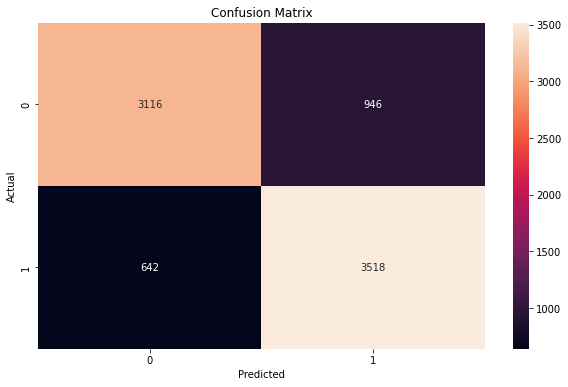

In [44]:
cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
matplot.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()


# Final Thought

Based on the results, the model has an overall accuracy of 0.8069 and an F1-score of 0.81, which suggests that the model is performing reasonably well. The model also has a recall of 0.8457 and a precision of 0.7881, which indicate that it is able to identify a high proportion of positive instances while also minimizing the false positives.


In terms of future improvements, few suggestions:

1.Having more data may help improve the model's accuracy and generalization performance.

2.Consider exploring additional features or transforming existing features to improve the model's ability to capture patterns in the data.

These two could be possible improvements other than the hyperparameter tunning which we already did in this exercise.



